In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestClassifier

In [27]:
df = pd.read_csv('XSSTraining.csv')
print("Dataset Shape: ", df.shape)
print("\nDataset Head: \n", df.head())
print("\nDataset Summary Statistics: \n", df.describe())
print("\nDataset Data Types: \n", df.dtypes)
print("\nMissing Values: \n", df.isnull().sum())
print("\nNumber of Duplicates: ", df.duplicated().sum())

Dataset Shape:  (19122, 66)

Dataset Head: 
    Contains &lt  ScripTag  Readable  Contains "><  Contains '><  Contains And  \
0             0         1         1             1             0             0   
1             0         1         1             1             0             0   
2             0         1         1             1             0             0   
3             0         1         0             0             0             1   
4             0         1         1             0             0             0   

   Contains Percentage  Contains Slash  Contains BackSlash  Contains Plus  \
0                    0               1                   0              0   
1                    0               1                   0              0   
2                    0               1                   0              0   
3                    1               1                   0              1   
4                    1               1                   0              0   

   ..

In [28]:
for column in df.columns:
    print(column, ":", df[column].dtype)

Contains &lt : int64
ScripTag : int64
Readable : int64
Contains ">< : int64
Contains '>< : int64
Contains And : int64
Contains Percentage : int64
Contains Slash : int64
Contains BackSlash : int64
Contains Plus : int64
Contains Document : int64
Contains Window : int64
Contains Onload : int64
Contains Onerror : int64
Contains DIV : int64
Contains iframe : int64
Contains img : int64
Contains SRC : int64
Containss Var : int64
Contains Eval : int64
Contains href : int64
Contains Cookie : int64
Contains StringfromCharCode : int64
Contains Single Quote : int64
Contains Question Mark : int64
Contains Exclamation Mark : int64
Contains Semicolon : int64
Contains HTTP : int64
Contains JS : int64
Contains Hash : int64
Contains Equal : int64
Contains Open Bracket : int64
Contains Close Bracket : int64
Contains Duble Bracket : int64
Contains Dollar : int64
Contains Open Parenthesis : int64
Contains Close Parenthesis : int64
Contains Asterisk : int64
Contains Comma : int64
Contains Hyphen : int64
Con

In [30]:
df = df.drop_duplicates()
print("Dataset Shape after dropping duplicates: ", df.shape)

Dataset Shape after dropping duplicates:  (14402, 66)


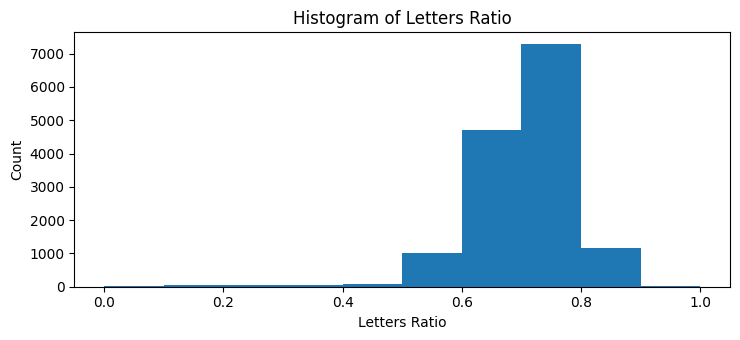

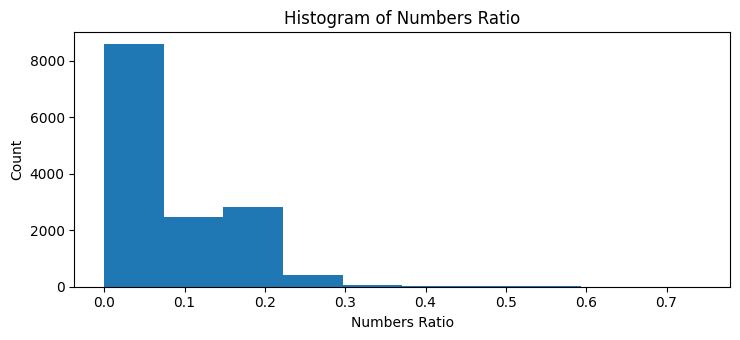

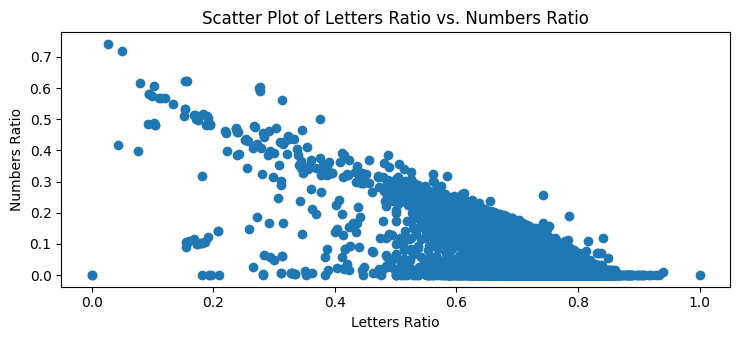

In [31]:
# Calculate summary statistics
summary_stats = df.describe()

# Plot histogram of a feature
plt.hist(df['Letters Ratio'])
plt.title("Histogram of Letters Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Count")
plt.show()

# Plot histogram of a feature
plt.hist(df['Numbuers Ratio'])
plt.title("Histogram of Numbers Ratio")
plt.xlabel("Numbers Ratio")
plt.ylabel("Count")
plt.show()

# Plot scatter plot of two features
plt.scatter(df['Letters Ratio'], df['Numbuers Ratio'])
plt.title("Scatter Plot of Letters Ratio vs. Numbers Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Numbers Ratio")
plt.show()

<class 'pandas.core.series.Series'>


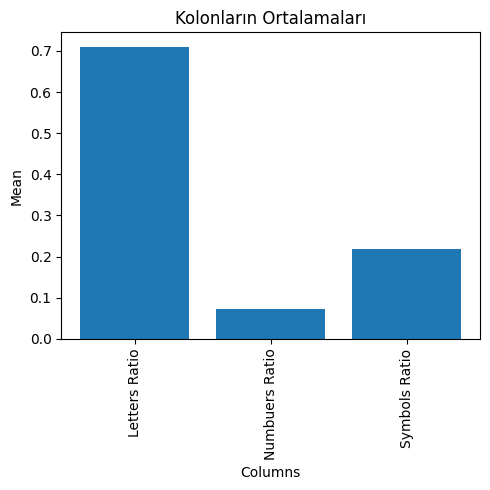

In [32]:
# calculate the mean of each column
means = df[['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']].mean()
print(type(means))
# create a bar plot
plt.figure(figsize=(5, 5))
plt.bar(means.index, means.values)
plt.xticks(rotation=90)
plt.title("Kolonların Ortalamaları")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
df[['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']] = standardscaler.fit_transform(df[['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']])

In [35]:
# create a list to store the column names with outliers
outliers_columns = []

# Select only numerical columns
num_cols = df.select_dtypes(include=["float64"]).columns
print(num_cols)
# Create boxplots for each numerical column
'''for col in num_cols:
    sns.boxplot(x=df[col])'''

# loop through each column in the dataset
for col in num_cols:

    # calculate z-score for each data point in the column
    z = np.abs(stats.zscore(df[col]))

    # find the indices of the data points with z-score greater than 3
    outlier_indices = np.where(z > 3)[0]

    # if there are outliers in the column
    if len(outlier_indices) > 0:
        
        # add the column name to the list of columns with outliers
        outliers_columns.append(col)
        
        # print the number of outliers in the column
        print(f"{col}: {len(outlier_indices)} tane outlier.")

# remove the rows with outliers
df_without_outliers = df.drop(df.index[outlier_indices])

# print the list of columns with outliers
print(f"\nColumns with outliers: {outliers_columns}")

# print the updated shape of the dataset
print(f"\nUpdated shape of the dataset: {df_without_outliers.shape}")

Index(['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio'], dtype='object')
Letters Ratio: 192 tane outlier.
Numbuers Ratio: 111 tane outlier.
Symbols Ratio: 180 tane outlier.

Columns with outliers: ['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']

Updated shape of the dataset: (14222, 66)


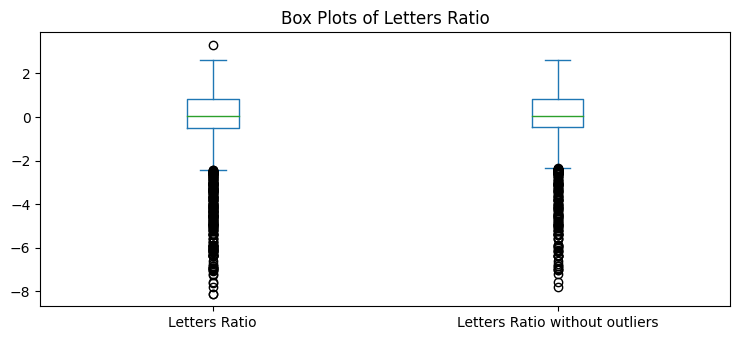

In [36]:
# Plot box plot of "Letters Ratio" feature
'''plt.boxplot(df['Letters Ratio'])
plt.title("Box Plot of Letters Ratio")
plt.ylabel("Letters Ratio")
plt.show()'''

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Letters Ratio": df['Letters Ratio'], "Letters Ratio without outliers": df_without_outliers['Letters Ratio']})

# Plot the dataframe
ax = data[['Letters Ratio', 'Letters Ratio without outliers']].plot(kind='box', title='Box Plots of Letters Ratio')

# Display the plot
plt.show()

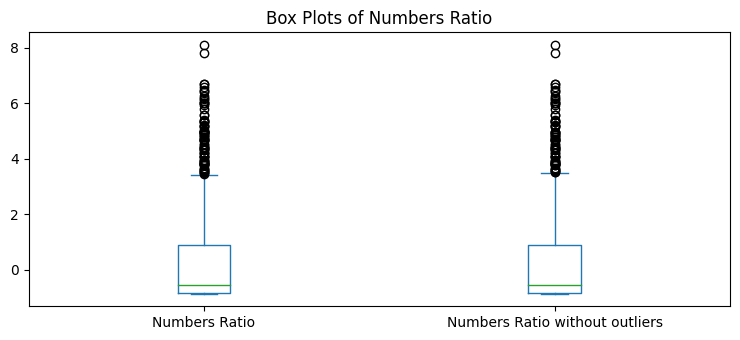

In [37]:
# Plot box plot of "Numbuers Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Numbers Ratio": df['Numbuers Ratio'], "Numbers Ratio without outliers": df_without_outliers['Numbuers Ratio']})

# Plot the dataframe
ax = data[['Numbers Ratio', 'Numbers Ratio without outliers']].plot(kind='box', title='Box Plots of Numbers Ratio')

# Display the plot
plt.show()

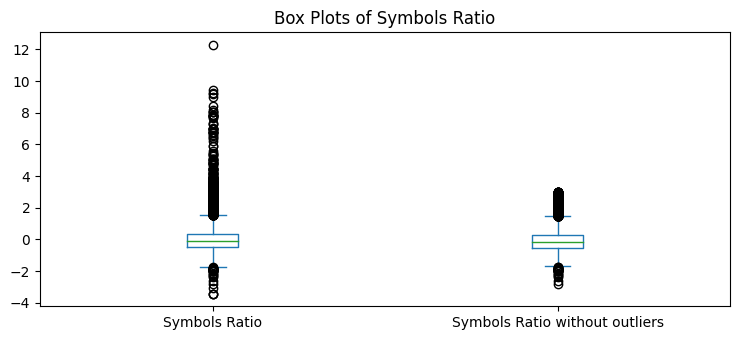

In [38]:
# Plot box plot of "Symbols Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Symbols Ratio": df['Symbols Ratio'], "Symbols Ratio without outliers": df_without_outliers['Symbols Ratio']})

# Plot the dataframe
ax = data[['Symbols Ratio', 'Symbols Ratio without outliers']].plot(kind='box', title='Box Plots of Symbols Ratio')

# Display the plot
plt.show()

In [40]:
# Count the missing values in each column
null_columns = df_without_outliers.isna().sum()
print(f"Number of columns with missing values: {len(null_columns[null_columns > 0])}")

Number of columns with missing values: 0


In [41]:
#There is no missing values so I generated missing values randomly.
for num in range(0,4):
    df_without_outliers.iloc[num, num] = np.nan
    
null_columns = df_without_outliers.isna().sum()
print(f"Number of columns with missing values: {len(null_columns[null_columns > 0])}")

Number of columns with missing values: 4


In [42]:
#get the column names that have missing values:
missing_cols = df_without_outliers.columns[df_without_outliers.isnull().any()].tolist()

print("Columns with missing values: ", missing_cols)

Columns with missing values:  ['Contains &lt', 'ScripTag', 'Readable', 'Contains "><']


<Axes: >

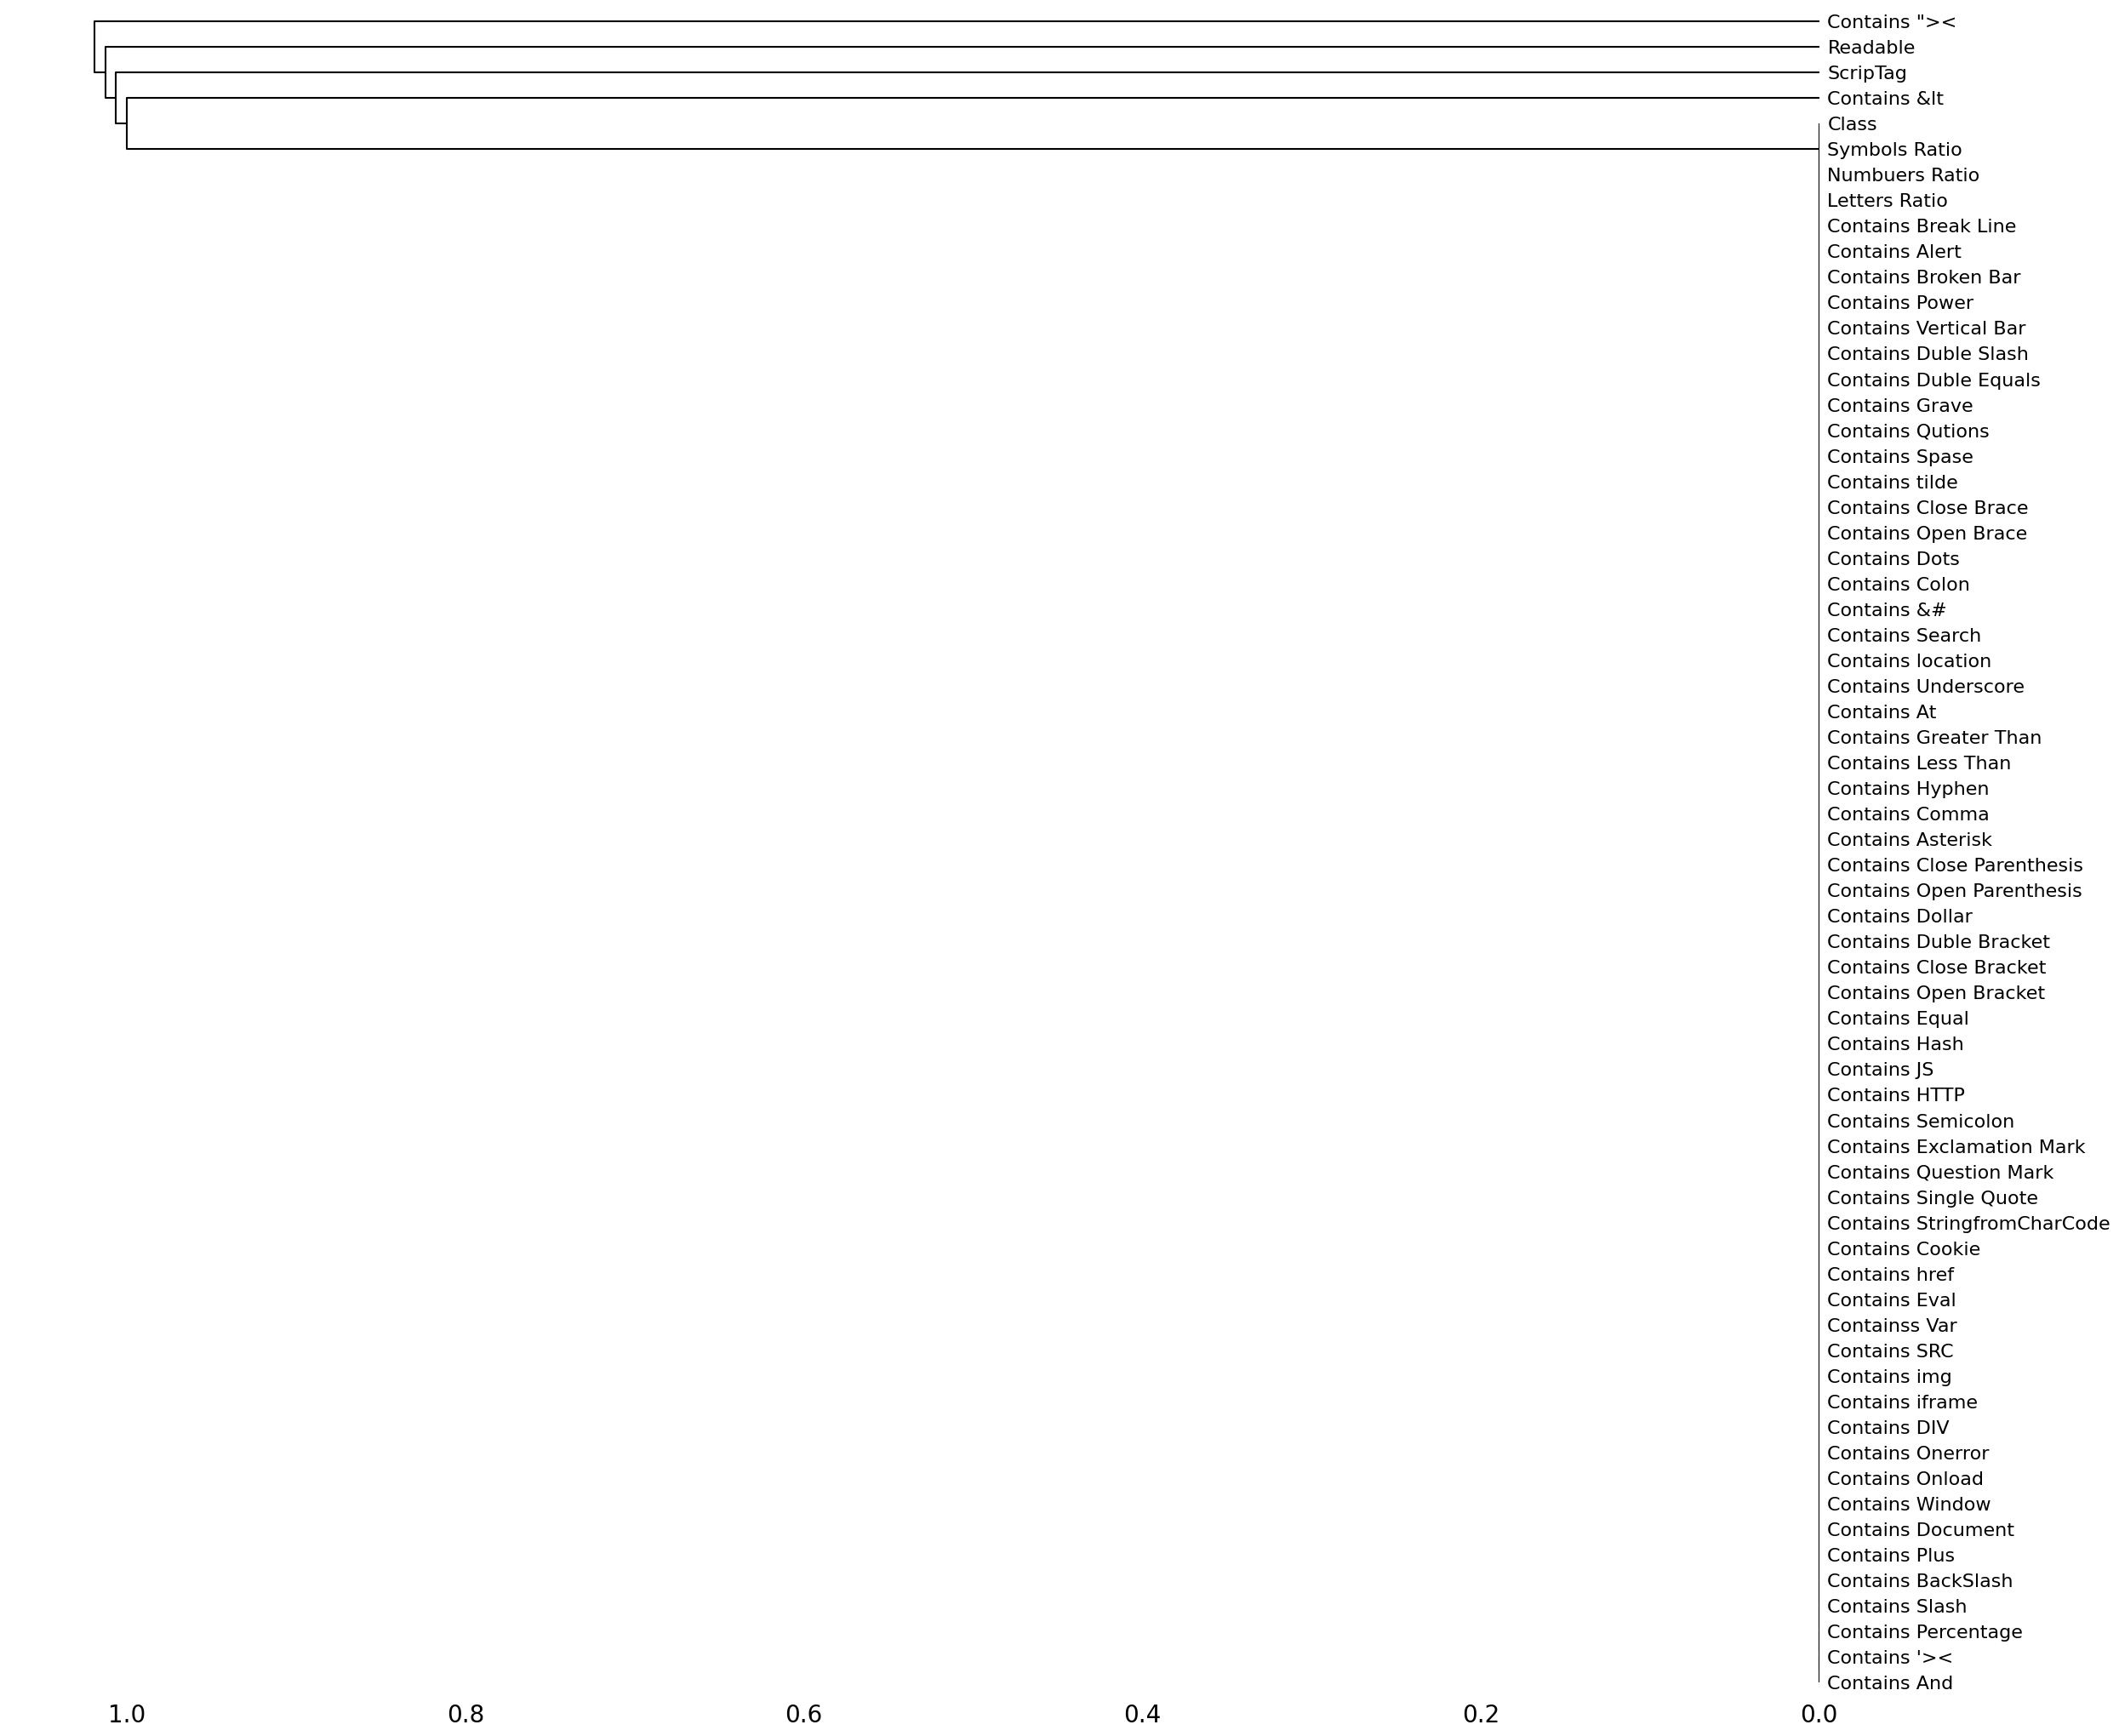

In [43]:
#create a missing value heatmap:
msno.dendrogram(df_without_outliers)

In [44]:
# Count missing values in each column
missing_values_count = df_without_outliers.isna().sum()

# Print the missing values count
print("Missing values count:\n", missing_values_count)

df_without_outliers.dropna(inplace=True)

Missing values count:
 Contains &lt           1
ScripTag               1
Readable               1
Contains "><           1
Contains '><           0
                      ..
Contains Break Line    0
Letters Ratio          0
Numbuers Ratio         0
Symbols Ratio          0
Class                  0
Length: 66, dtype: int64


<ipython-input-45-0162d4c55bcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_without_outliers.corr()


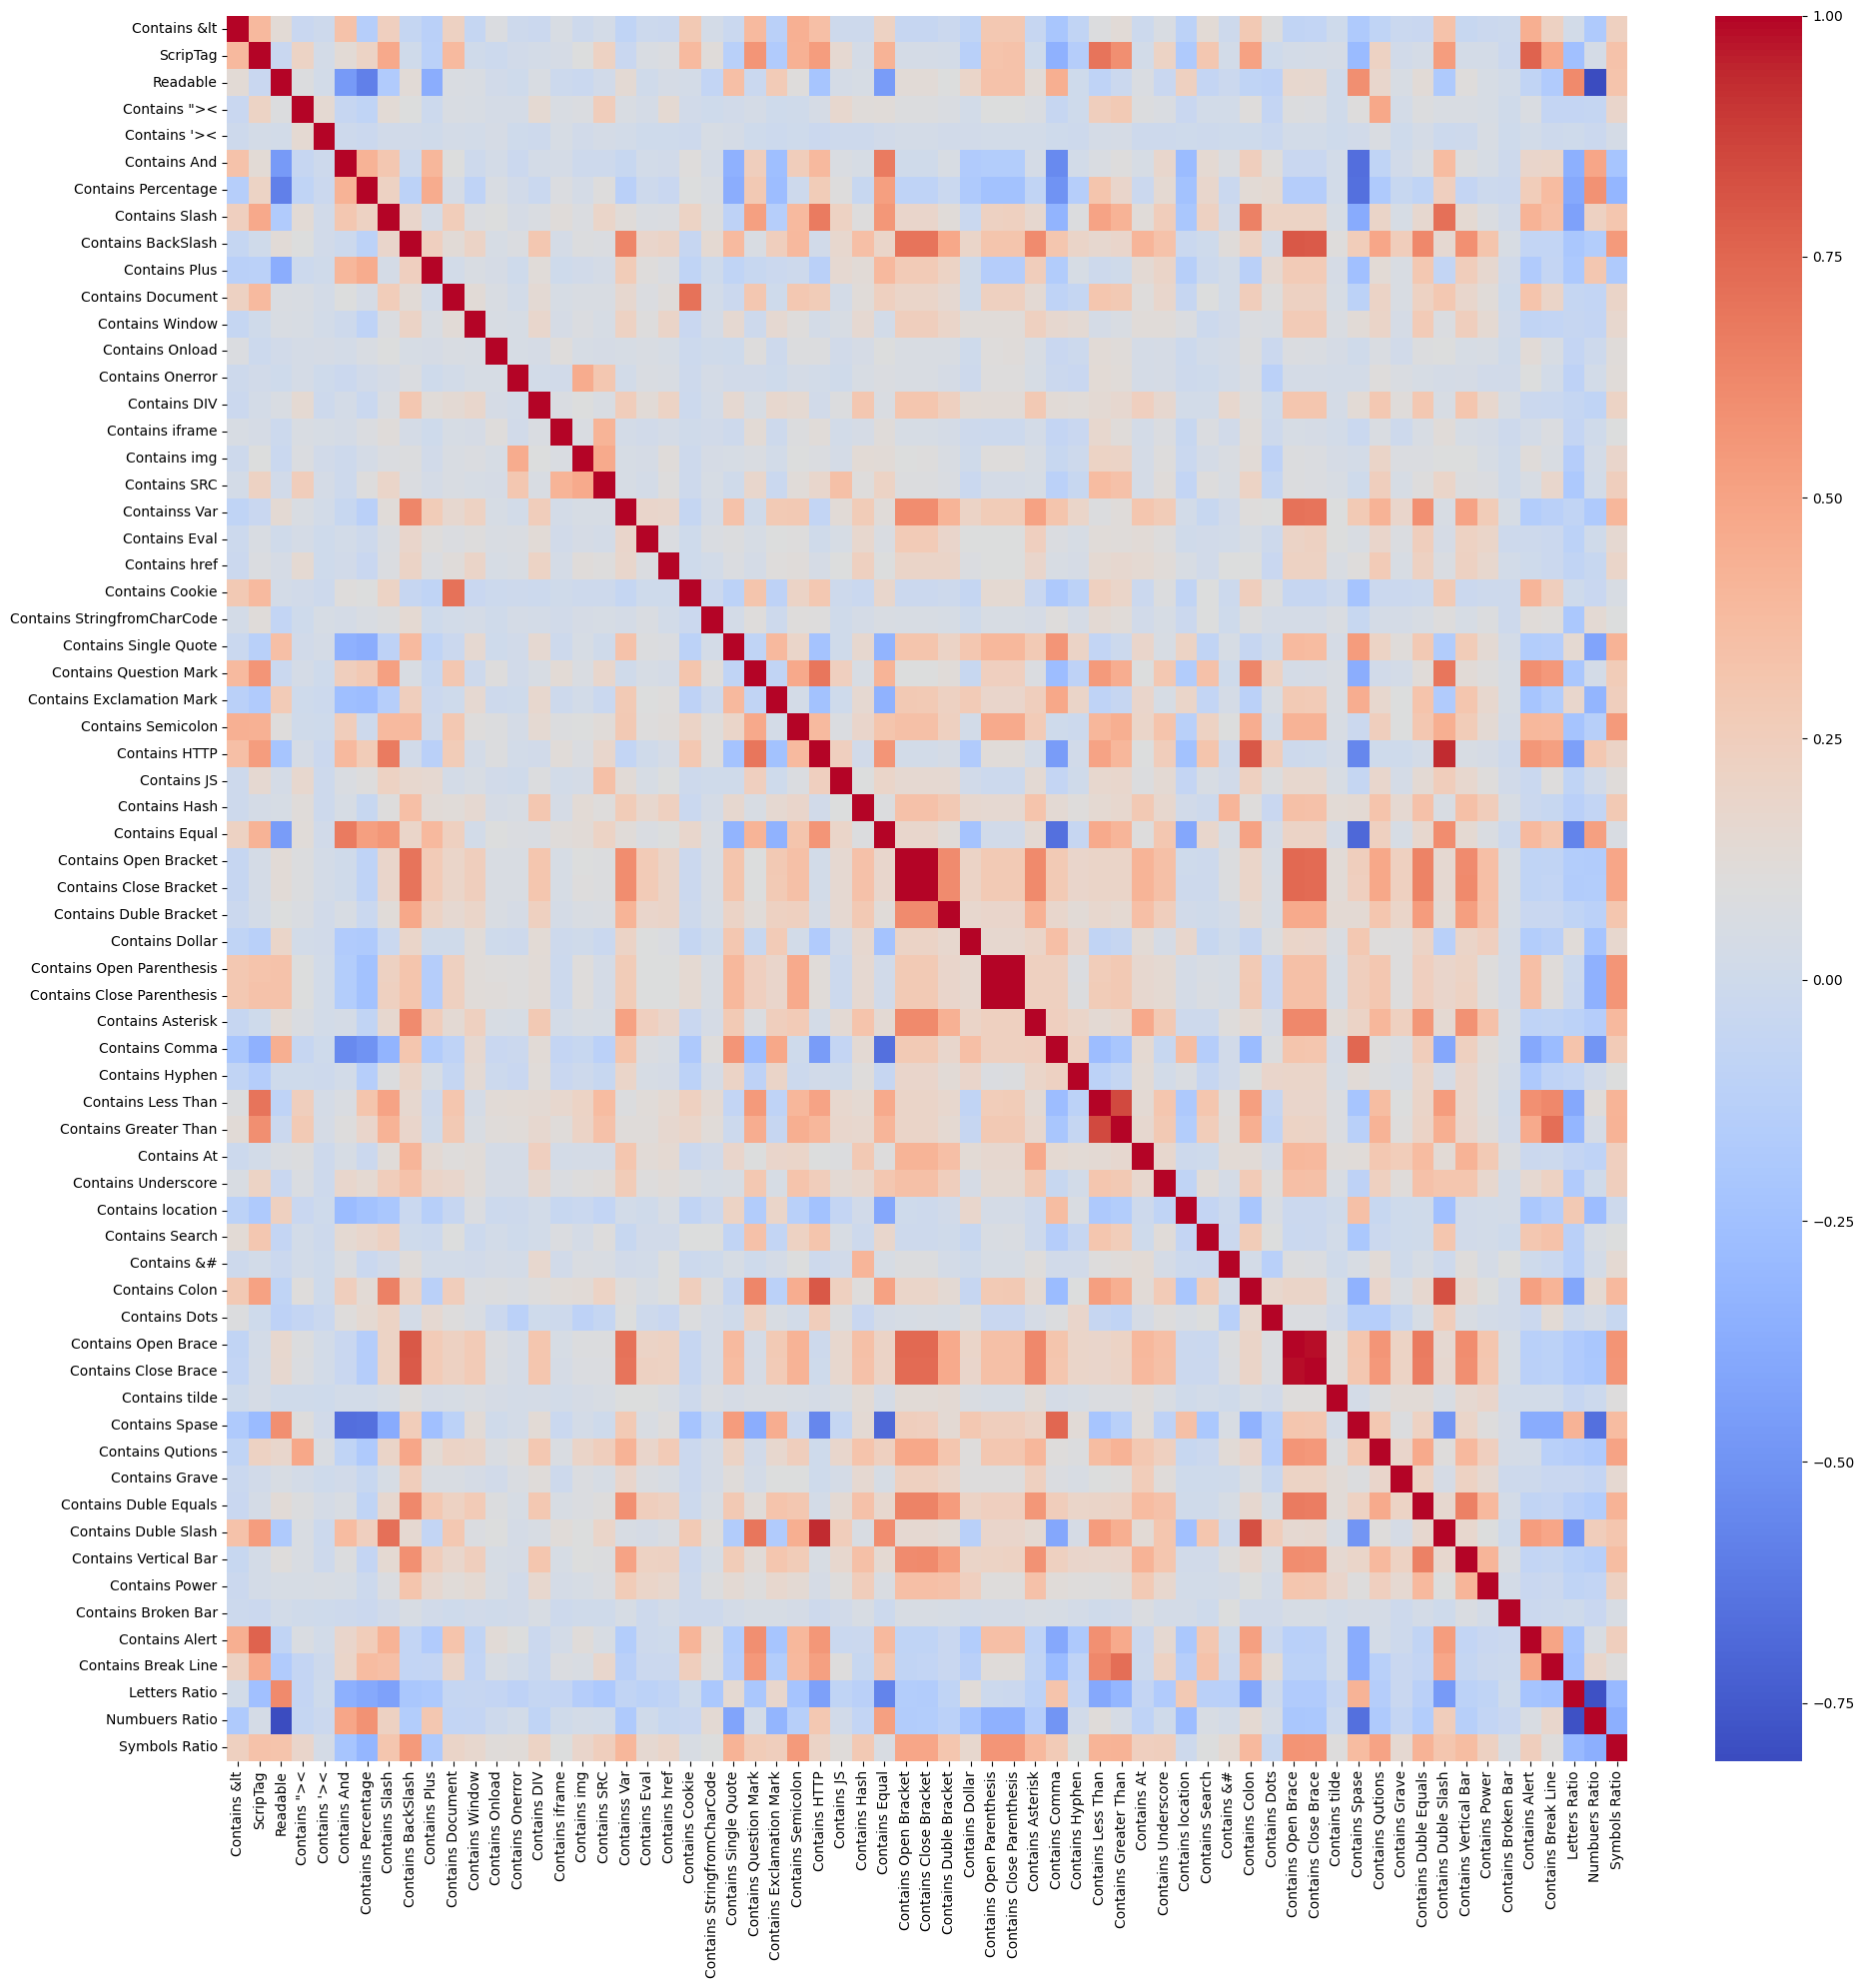

In [45]:
# Create a correlation matrix using the corr() function
corr_matrix = df_without_outliers.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.savefig('corrmatrix.png')

In [46]:
#Feature Engineering Part
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Class'.
df_without_outliers['Class'] = label_encoder.fit_transform(df_without_outliers['Class'])
'''label_mapping = dict(zip(df_without_outliers['class'], df_without_outliers['Class']))
label_mapping'''

"label_mapping = dict(zip(df_without_outliers['class'], df_without_outliers['Class']))\nlabel_mapping"

In [47]:
#Split the dataset into features and target
X = df_without_outliers.drop('Class', axis=1)
y = df_without_outliers['Class']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [79]:
#algorithms without pca
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm
classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm = classifier_svm.predict(X_test)
print("Accuracy Score SVM:", accuracy_score(y_test, y_pred_svm))
print('Training set score SVM: {:.4f}'.format(classifier_svm.score(X_train, y_train)))
print('Test set score SVM: {:.4f}'.format(classifier_svm.score(X_test, y_test)))
scores_svm = cross_val_score(classifier_svm, X, y, cv=5)
print("Cross Validation Results SVM: ", scores_svm)
print("SVM %0.2f accuracy with a standard deviation of %0.2f" % (scores_svm.mean(), scores_svm.std()))

Accuracy Score SVM: 0.9859353023909986
Training set score SVM: 0.9881
Test set score SVM: 0.9859
Cross Validation Results SVM:  [0.44479606 0.95815752 0.99683544 0.99929652 0.98979951]
SVM 0.88 accuracy with a standard deviation of 0.22


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
print("Accuracy Score KNN:", accuracy_score(y_test, y_pred_knn))
print('Training set score KNN: {:.4f}'.format(classifier_knn.score(X_train, y_train)))
print('Test set score KNN: {:.4f}'.format(classifier_knn.score(X_test, y_test)))
scores_knn = cross_val_score(classifier_knn, X, y, cv=5)
print("Cross Validation Results KNN: ", scores_knn)
print("KNN %0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

Accuracy Score KNN: 0.9885138302859822
Training set score KNN: 0.9926
Test set score KNN: 0.9885
Cross Validation Results KNN:  [0.51265823 0.96554149 0.99964838 0.99929652 0.9862821 ]
KNN 0.89 accuracy with a standard deviation of 0.19


In [95]:
knn_r_acc = []

for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df_knn_accs = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df_knn_accs)

     K  Test Score  Train Score
0    2    0.987576     0.995679
1    3    0.988748     0.995579
2    4    0.988045     0.992062
3    5    0.988514     0.992564
4    6    0.987576     0.990454
5    7    0.987576     0.990052
6    8    0.986404     0.988846
7    9    0.987342     0.989148
8   10    0.986170     0.988645
9   11    0.987107     0.989248
10  12    0.986170     0.988244
11  13    0.986404     0.988445
12  14    0.985466     0.987440
13  15    0.986404     0.988143
14  16    0.984529     0.987741
15  17    0.984294     0.987138
16  18    0.984060     0.986636
17  19    0.984060     0.986535
18  20    0.983357     0.986234
19  21    0.983357     0.986435
20  22    0.983122     0.985229
21  23    0.982888     0.985330
22  24    0.982654     0.984325
23  25    0.983357     0.984526
24  26    0.982185     0.983923
25  27    0.982419     0.984224
26  28    0.982185     0.984124
27  29    0.982419     0.983822
28  30    0.981950     0.983621
29  31    0.982185     0.983521
30  32  

In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier_randomforest = RandomForestClassifier(max_depth=2, random_state=0)
classifier_randomforest.fit(X_train, y_train)
y_pred_randomforest = classifier_randomforest.predict(X_test)
print("Accuracy Score RandomForest:", accuracy_score(y_test, y_pred_randomforest))
print('Training set score RandomForest: {:.4f}'.format(classifier_randomforest.score(X_train, y_train)))
print('Test set score RandomForest: {:.4f}'.format(classifier_randomforest.score(X_test, y_test)))
scores_randomforest = cross_val_score(classifier_randomforest, X, y, cv=5)
print("Cross Validation Results RandomForest: ", scores_randomforest)
print("RandomForest %0.2f accuracy with a standard deviation of %0.2f" % (scores_randomforest.mean(), scores_randomforest.std()))

Accuracy Score RandomForest: 0.9556962025316456
Training set score RandomForest: 0.9596
Test set score RandomForest: 0.9557
Cross Validation Results RandomForest:  [0.59247539 0.947609   0.97890295 0.98311643 0.96588111]
RandomForest 0.89 accuracy with a standard deviation of 0.15


In [96]:
#PCA
from sklearn.decomposition import PCA

# Apply PCA to the standardized features
pca = PCA()
principal_components = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"feature{i+1}" for i in range(principal_components.shape[1])]
principal_components = pd.DataFrame(principal_components, columns=component_names)

principal_components.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65
0,1.254025,-0.984705,0.408217,0.473463,-1.029863,0.570187,0.195882,0.157097,-0.362342,-0.281390,...,0.006236,-0.010422,-0.004705,0.026046,-0.001015,0.001303,-0.006804,0.002622,0.000315,0.000014
1,1.851089,-0.462271,-0.812840,-0.137585,-0.517822,0.339655,0.426771,0.325167,0.015435,-0.130798,...,0.199172,-0.050093,0.874169,0.068425,-0.006366,-0.001357,0.004361,-0.012370,0.000044,-0.000672
2,2.268988,-0.337699,0.275066,1.097446,0.063274,0.662974,0.156411,-0.302296,-0.712970,0.100088,...,-0.019341,0.022586,-0.003115,0.007630,0.007753,0.002442,-0.002299,0.001822,0.000495,0.000010
3,2.425620,-0.265204,0.450207,1.222202,0.067384,0.680671,0.098212,-0.339685,-0.684029,0.077461,...,-0.018568,0.020895,-0.002912,0.004492,0.007571,0.002232,-0.002160,0.001860,0.000387,0.000010
4,2.156753,-0.724091,-0.463414,-0.484936,-0.915879,0.225403,0.341706,-0.142652,-0.267600,0.453191,...,-0.050260,-0.004705,-0.010763,-0.001101,-0.005964,-0.002064,0.012988,0.004556,-0.000367,0.000055


In [72]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [2.86425199e-01 2.13602677e-01 9.62436537e-02 4.92015353e-02
 3.73755108e-02 3.23048462e-02 2.71118998e-02 2.05800060e-02
 1.77520559e-02 1.40718640e-02 1.38335866e-02 1.15570904e-02
 1.11876064e-02 1.06272060e-02 9.62605598e-03 9.43102426e-03
 9.11957897e-03 8.16174856e-03 7.46888172e-03 7.24888218e-03
 6.85174897e-03 6.70474660e-03 5.89718872e-03 5.74348272e-03
 5.44601588e-03 5.32016932e-03 5.08650042e-03 4.86272610e-03
 4.38101849e-03 4.07765727e-03 3.88475903e-03 3.61485700e-03
 3.34392934e-03 3.09422288e-03 2.89468075e-03 2.72378964e-03
 2.59587004e-03 2.37657302e-03 2.24519920e-03 2.12622548e-03
 2.02214736e-03 1.95930748e-03 1.80250331e-03 1.66191366e-03
 1.65288648e-03 1.43205291e-03 1.38766917e-03 1.33539521e-03
 1.28381666e-03 1.19879340e-03 1.16077246e-03 1.14581276e-03
 1.04590229e-03 8.81373725e-04 8.49809414e-04 7.60010148e-04
 7.34000177e-04 5.46816005e-04 3.70412555e-04 1.70330243e-04
 1.68864526e-04 1.34757084e-04 6.3249656

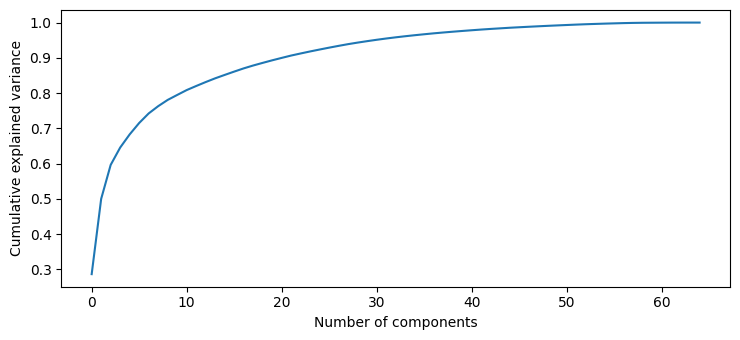

In [73]:
# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [97]:
# Apply PCA to the standardized features
pca2 = PCA(n_components=20)
principal_components2 = pca2.fit_transform(X)

# Convert to dataframe
component_names = [f"feature{i+1}" for i in range(principal_components2.shape[1])]
principal_components2 = pd.DataFrame(principal_components2, columns=component_names)
principal_components2.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
0,1.254025,-0.984705,0.408217,0.473463,-1.029858,0.570197,0.195941,0.157155,-0.362373,-0.281213,0.281835,-0.345514,-0.273148,-0.093297,-0.156620,-0.243596,0.228632,-0.192905,0.136089,-0.368477
1,1.851089,-0.462271,-0.812839,-0.137582,-0.517819,0.339714,0.426817,0.325045,0.014906,-0.131774,0.665093,0.055922,0.140926,-0.500007,-0.048029,-0.340968,-0.624322,-0.003370,0.218930,0.026577
2,2.268988,-0.337699,0.275067,1.097449,0.063276,0.663038,0.156499,-0.302325,-0.713468,0.099609,0.598155,-0.260368,-0.226527,-0.605620,0.819272,-0.522614,-0.060876,0.112364,-0.077127,-0.274353
3,2.425620,-0.265204,0.450208,1.222205,0.067386,0.680737,0.098303,-0.339716,-0.684541,0.076969,0.646327,-0.250219,-0.246945,-0.586744,0.830222,-0.494942,-0.044079,0.106884,-0.074863,-0.251040
4,2.156753,-0.724091,-0.463415,-0.484927,-0.915873,0.225364,0.341584,-0.142529,-0.267680,0.455383,0.736898,-0.140222,0.018085,-0.443238,0.506334,0.569774,0.237916,0.332612,0.242072,0.181663


<Axes: >

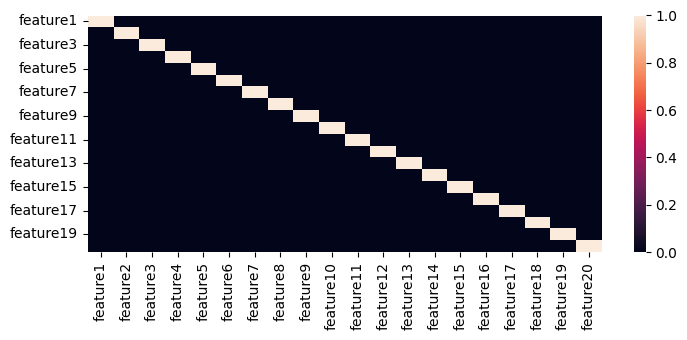

In [86]:
sns.heatmap(principal_components2.corr())

In [87]:
principal_components2.shape

(14218, 20)

In [ ]:
#print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))

'''
# giving a larger plot
plt.figure(figsize =(8, 6))
 
plt.scatter(principal_components2[:, 0], principal_components2[:, 1], c = df_without_outliers['Class'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()'''

In [98]:
#algorithms with pca
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(principal_components2, y, test_size=0.3, random_state=1)
classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm = classifier_svm.predict(X_test)
print("Accuracy Score SVM:", accuracy_score(y_test, y_pred_svm))
print('Training set score SVM: {:.4f}'.format(classifier_svm.score(X_train, y_train)))
print('Test set score SVM: {:.4f}'.format(classifier_svm.score(X_test, y_test)))
scores_svm_pca = cross_val_score(classifier_svm, principal_components2, y, cv=5)
print("Cross Validation Results SVM: ", scores_svm_pca)
print("SVM %0.2f accuracy with a standard deviation of %0.2f" % (scores_svm_pca.mean(), scores_svm_pca.std()))

Accuracy Score SVM: 0.9758556024378809
Training set score SVM: 0.9783
Test set score SVM: 0.9759
Cross Validation Results SVM:  [0.4395218  0.92405063 0.99437412 0.99718607 0.9760816 ]
SVM 0.87 accuracy with a standard deviation of 0.21


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
print("Accuracy Score KNN:", accuracy_score(y_test, y_pred_knn))
print('Training set score KNN: {:.4f}'.format(classifier_knn.score(X_train, y_train)))
print('Test set score KNN: {:.4f}'.format(classifier_knn.score(X_test, y_test)))
scores_knn_pca = cross_val_score(classifier_knn, principal_components2, y, cv=5)
print("Cross Validation Results KNN: ", scores_knn_pca)
print("KNN %0.2f accuracy with a standard deviation of %0.2f" % (scores_knn_pca.mean(), scores_knn_pca.std()))

Accuracy Score KNN: 0.986404125644632
Training set score KNN: 0.9911
Test set score KNN: 0.9864
Cross Validation Results KNN:  [0.45112518 0.96554149 0.99929677 0.99894478 0.99155821]
KNN 0.88 accuracy with a standard deviation of 0.22


In [100]:
classifier_randomforest = RandomForestClassifier(max_depth=2, random_state=0)
classifier_randomforest.fit(X_train, y_train)
y_pred_randomforest = classifier_randomforest.predict(X_test)
print("Accuracy Score RandomForest:", accuracy_score(y_test, y_pred_randomforest))
print('Training set score RandomForest: {:.4f}'.format(classifier_randomforest.score(X_train, y_train)))
print('Test set score RandomForest: {:.4f}'.format(classifier_randomforest.score(X_test, y_test)))
scores_randomforest_pca = cross_val_score(classifier_randomforest, principal_components2, y, cv=5)
print("Cross Validation Results RandomForest: ", scores_randomforest_pca)
print("RandomForest %0.2f accuracy with a standard deviation of %0.2f" % (scores_randomforest_pca.mean(), scores_randomforest_pca.std()))

Accuracy Score RandomForest: 0.8952180028129395
Training set score RandomForest: 0.8998
Test set score RandomForest: 0.8952
Cross Validation Results RandomForest:  [0.70182841 0.90189873 0.95253165 0.93774182 0.88568414]
RandomForest 0.88 accuracy with a standard deviation of 0.09


In [101]:
knn_r_acc = []
for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df_knn_accs = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df_knn_accs)

     K  Test Score  Train Score
0    2    0.984998     0.994875
1    3    0.986873     0.994273
2    4    0.985701     0.990957
3    5    0.986404     0.991057
4    6    0.985232     0.989349
5    7    0.985935     0.989851
6    8    0.984529     0.988244
7    9    0.985232     0.988244
8   10    0.984529     0.988043
9   11    0.984529     0.987741
10  12    0.983591     0.986636
11  13    0.983826     0.987038
12  14    0.983357     0.986636
13  15    0.984529     0.987339
14  16    0.983591     0.986837
15  17    0.983591     0.986937
16  18    0.982654     0.985732
17  19    0.982888     0.986435
18  20    0.982888     0.985430
19  21    0.983357     0.985330
20  22    0.983357     0.984928
21  23    0.983122     0.984827
22  24    0.982419     0.984224
23  25    0.982654     0.983923
24  26    0.982419     0.983219
25  27    0.982419     0.982818
26  28    0.981950     0.983119
27  29    0.981716     0.982416
28  30    0.981481     0.982617
29  31    0.981481     0.982315
30  32  